# Assignment 2
Basic Aerodynamics  
s134166 Aleksander Andersen  
s000000 Martin Simon

In [71]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Part 1 - Planar/rectangular
Employ the fundamental equation of Prandtl’s lifting-line theory to determine the distribution of induced angle of attack along the wing for different aspect ratios, AR, and angles of attack, AOA. Plot the distributions for AR = 4, 6, 8, 10 and AOA = 0°, 5°, 10°. Compute the corresponding induced drag and lift coefficients.

The fundamental equation of Prandtl's lifting line theory is
$$ \alpha(y_0) = \dfrac{\Gamma(y_0)}{\pi V_{\infty}c(y_0)}
+ \alpha_{L=0}(y_0) + \dfrac{1}{4\pi V_{\infty}} \int_{-b/2}^{b/2} \dfrac{(d\Gamma/dy)dy}{y_0-y}$$  
where  
$y$: lifting line axis  
$b$: wing span ( $ \pm b/2$)  

$\text{AR} =b^2/S$  
$S$: area (for rectangular plate)

$S=cb \Rightarrow \text{AR}=b/c$

Eq. 8.44a rewritten with $A_R= b/c$  
$ \sum_{n=1}^\infty A_n \sin{n\theta}
\left( \dfrac{4 \, A_R(\theta)}{m_0(\theta)} + \dfrac{n}{\sin{\theta}}
\right) = \alpha (\theta) - \alpha_{L0}(\theta)$  
Corresponds to matrix equation  
$Ax=b$

In [80]:
def planarWing(AR, alphad):
    m0 = 0.11*180/np.pi
    alpha = alphad *np.pi/180
    alpha_L0 = -4 *np.pi/180
    
    # number of sums 
    n_max = 20 # number of terms in sum
    n = np.linspace(1,n_max,n_max).astype(int)
    
    # number of equations (theta values)
    nEQ = n_max
    nEQ2 = int(nEQ+2)
    theta = np.linspace(np.pi/nEQ, np.pi-np.pi/nEQ, nEQ)
    #theta= theta[1: nEQ2-1]
    
    M = np.empty((nEQ, n_max)) # Empty matrix (100x100)
    b = np.empty( nEQ )
    for i in range(nEQ):
        for j in range(n_max):
            # Calculate coefficients
            M[i,j] = np.sin(n[j]*theta[i]) *(4*AR/m0 + n[j]/np.sin(theta[i]))
        b[i] = alpha-alpha_L0 # RHS
    # Solve system
    An = np.linalg.solve(M,b)
    
    # Calculate induced angles
    alpha_i = np.empty(nEQ) # empty
    for i in range(nEQ):
        alpha_i[i] = sum(n*An*np.sin(n*theta[i])/np.sin(theta[i]))
    
    # Induced lift and drag
    C_L = np.pi*AR * An[0] # eq. (8.51)
    C_D = np.pi*AR * np.sum(n*An**2) # eq. (8.52)
    return n, theta, C_L, C_D, alpha_i, An

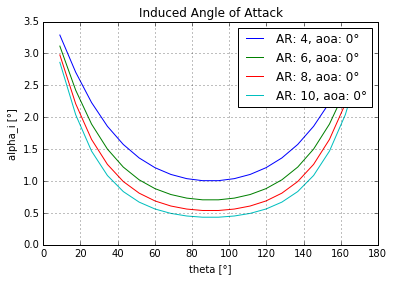

In [81]:
## PLOTTING RESULTS FOR 2.1

plt.figure()
AR, alphad = 4, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 6, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 8, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 10, 0
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [°]')
plt.ylabel('alpha_i [°]')
plt.grid()
plt.legend()

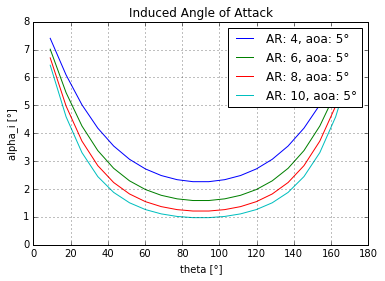

In [82]:
plt.figure()
AR, alphad = 4, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 6, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 8, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 10, 5
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [°]')
plt.ylabel('alpha_i [°]')
plt.grid()
plt.legend()

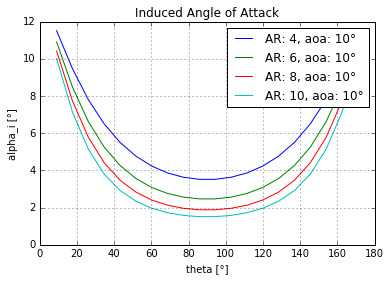

In [83]:
plt.figure()
AR, alphad = 4, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 6, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 8, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

AR, alphad = 10, 10
n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))

plt.title('Induced Angle of Attack')
plt.xlabel('theta [°]')
plt.ylabel('alpha_i [°]')
plt.grid()
plt.legend()

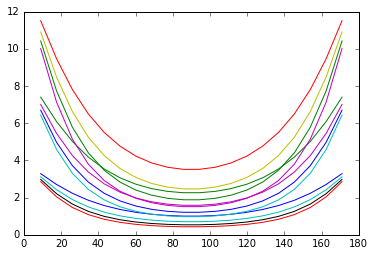

In [84]:
# All combinations - Plotted in same window
plt.figure()
for i in [4,6, 8,10]:
    for j in [0, 5, 10]:
        AR, alphad = i, j
        n,theta,Cl,Cd,ai,An = planarWing(AR, alphad)
        plt.plot(theta*180/np.pi, ai*180/np.pi, label='AR: {0:.0f}, aoa: {1:.0f}°'.format(AR, alphad))
#plt.legend()

### Part 2 - Elliptic
Compute the induced angle of attack and induced drag coefficient for an elliptic wing with the same aspect ratios. Compare and discuss the solutions.  
  

### Part 3-5 (Tapered wing)